In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
basedir = '/content/drive/MyDrive/Applied Deep Learning Final/'
df_train = pd.read_csv(basedir+'Train Data.csv')
df_test = pd.read_csv(basedir+'Test Data.csv')

In [4]:
print(df_train.shape)
df_train.head()

(3332, 2)


,Image Name,Color
0,e05a4ce4-dbd5-4c47-8b40-c145c7f5d06c.jpg,1
1,6b4529c3-8edb-4909-b910-806450a39d2e.jpg,1
2,b124ccc4-76e3-41a4-92b2-8f1d06ea9cb8.jpg,2
3,2dd0fef1-209f-4de5-a736-8f9bca2faa0a.jpg,2
4,6a7c6b2c-9ba0-4fc1-9922-0988acf2dfde.jpg,3


In [5]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tqdm import tqdm

def horrid_read(df, path):
    img_size = 299
    X = []
    for i in tqdm(range(df.shape[0])):
 
        img = image.load_img(path[i], target_size=(img_size, img_size, 3))
        img = image.img_to_array(img).astype('float32')
        #img = tf.image.resize(img, (img_size, img_size))

        X.append(img)
    return np.array(X)
path = basedir + 'train_images/' + df_train['Image Name']
X = horrid_read(df_train, path)
print(X.shape)

100%|██████████| 3332/3332 [18:30<00:00,  3.00it/s]


(3332, 299, 299, 3)


In [6]:
path = basedir + 'test_images/' + df_test['Image Name']
X_test = horrid_read(df_test, path)
print(X_test.shape)

100%|██████████| 1433/1433 [07:54<00:00,  3.02it/s]


(1433, 299, 299, 3)


In [7]:
y = df_train['Color']
print(y.shape)
labels = y

(3332,)


In [8]:
X[100].shape

(299, 299, 3)

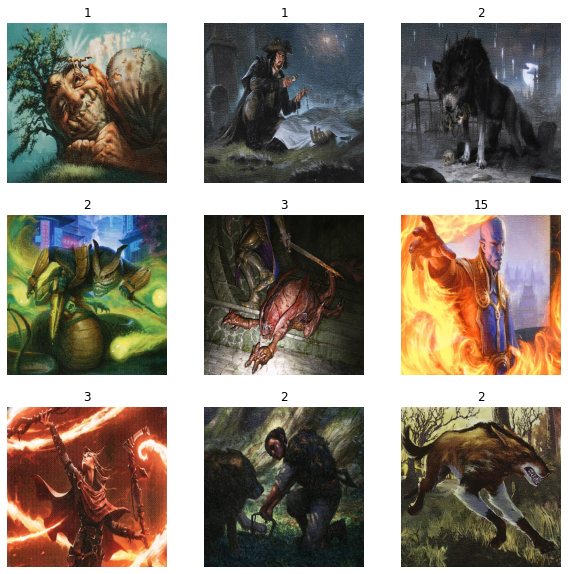

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.array_to_img(X[i]))
    plt.title(y[i])
    plt.axis("off")

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

def myNN(train_data):

    model = models.Sequential()

    #model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', input_shape = train_data.shape[1:]))
    #model.add(layers.MaxPooling2D(pool_size=(2,2)))

    #model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape = train_data.shape[1:]))
    #model.add(layers.MaxPooling2D(pool_size=(2,2)))
    #model.add(layers.Rescaling(1./255, input_shape=(299, 299, 3)))
    #model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', input_shape = train_data.shape[1:]))
    #model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape = train_data.shape[1:]))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = train_data.shape[1:]))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))


    model.add(layers.Flatten())

    #model.add(layers.Dense(units=64, activation='relu', name='hidden1'))
    model.add(layers.Dense(units=64, activation='relu', name='hidden2'))

    model.add(layers.Dense(units=16, activation='softmax',name='output'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [11]:
model = myNN(X)


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 hidden2 (Dense)             (None, 64)                1

In [13]:
#X = np.array(X)
#print(X.shape)

In [14]:
#y = np.array(y)

In [ ]:
model = model.fit( X,y, epochs=6, batch_size=64, verbose=1)


Epoch 1/6
53/53 [==============================] - 573s 11s/step - loss: 149.5606 - accuracy: 0.1837
Epoch 2/6


In [ ]:
y_test=model.model.predict(X_test)


In [ ]:
print(y_test[:2])
predClass = np.argmax(y_test, axis=-1) #pick the highest prob per sample
predClass[:2]

In [ ]:
df_result = pd.read_csv(basedir+ 'Test Data - Result.csv')
df_result['Color'] = predClass
df_result.head()

In [ ]:
df_result.to_csv('result.csv', index=False)